## MobileNet

# Octavionus Samuel Kusuma Wardana, 220711661, TensorFlow, berry, MobileNet

In [1]:
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten


2024-12-20 21:25:31.363893: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-20 21:25:31.392873: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734704731.414590 3442704 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734704731.420720 3442704 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 21:25:31.446259: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### Load Data
- Load dataset berdasarkan path dimana dataset disimpan

In [2]:
count = 0 
dirs = os.listdir(r'train_data')
for dir in dirs:
    files = list(os.listdir(r'train_data/'+dir))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count = count + len(files)
print('Images Folder has ' + str(count) + ' Images')

BlackBerry Folder has 100 Images
Blueberry Folder has 100 Images
Strawberry Folder has 100 Images
.ipynb_checkpoints Folder has 0 Images
Images Folder has 300 Images


### Load Images into Arrays as Dataset
- Membuat dataset dari gambar yang ada di direktori

In [3]:
base_dir = r'train_data' 
img_size = 180 
batch = 32 
validation_split = 0.1 
test_split = 0.1

- Memasukkan parameter yang telah di definisikan tadi untuk membuat dataset dari gambar di direktori


In [4]:
dataset = tf.keras.utils.image_dataset_from_directory(
    base_dir, 
    seed=123, 
    image_size=(img_size, img_size), 
    batch_size=batch, 
)

Found 300 files belonging to 3 classes.


W0000 00:00:1734704733.605485 3442704 gpu_device.cc:2344] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [5]:

class_names = dataset.class_names 
print("Class Names:", class_names)

Class Names: ['BlackBerry', 'Blueberry', 'Strawberry']


### Train-Validation-Test Split
- Membagi dataset menjadi tiga subset yaitu train, validation, dan test
    - Train, digunakan untuk melatih model agar mengenali pola dalam data
    - Validation, digunakan untuk mengevaluasi performa model selama pelatihan
    - Test, digunakan untuk menguji model setelah pelatihan

In [6]:
total_count = len(dataset)
val_count = int(total_count * validation_split)
tes_count = int(total_count * test_split)
train_count = total_count - val_count - tes_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)
print("Test Images:", tes_count)

Total Images: 10
Train Images: 8
Validation Images: 1
Test Images: 1


In [7]:
train_ds = dataset.take(train_count)
remaining = dataset.skip(train_count)
val_ds = dataset.skip(train_count)
tes_ds = remaining.skip(tes_count)

In [8]:
for images, labels in train_ds.take(1):  # Ambil 1 batch untuk diperiksa
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)

    images_array = np.array(images)
    print(images_array.shape)

Shape of images: (32, 180, 180, 3)
Shape of labels: (32,)
(32, 180, 180, 3)


2024-12-20 21:25:34.131042: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2024-12-20 21:25:34.891443: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


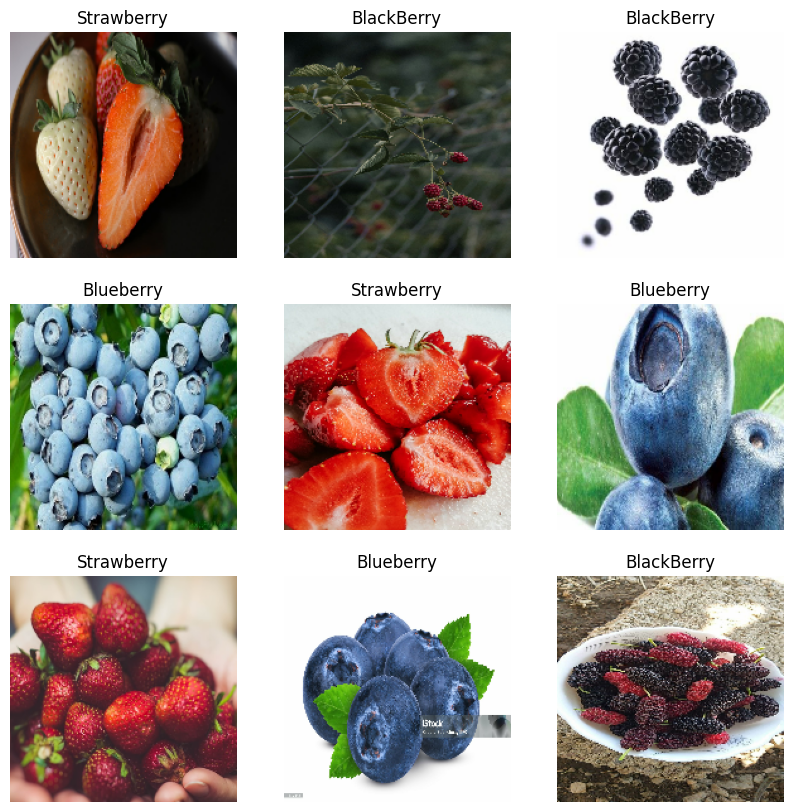

In [9]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10)) 

for images, labels in train_ds.take(1):
    for i in range(9): #mengambil 1 batch pertama dari train_ds
        plt.subplot(3,3, i+1) #menyiapkan subplot dengan grid 3x3 dan menempatkan gambar pada posisi i+1
        plt.imshow(images[i].numpy().astype('uint8')) #menampilkan gambar dan mengonversi ke tipe uint8
        plt.title(class_names[labels[i]]) #menampilkan judul gambar sesuai dengan nama kelas
        plt.axis('off') #menonaktifkan sumbu pada gambar agar tidak terlihat

In [10]:
import numpy as np

for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)  

(32, 180, 180, 3)


In [11]:
AUTOTUNE = tf.data.AUTOTUNE

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [13]:
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

### Data Augmentation
- Digunakan untuk menambah variasi data pelatihan dengan membuat gambar baru dari yang sudah ada seperti dengan rotasi, flipping, zooming, dan sebagainy
- Untuk mengurangi overfitting dan memperbesar dataset tanpa mengumpulkan data baru

In [14]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)), 
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1) 
])

/opt/tljh/user/envs/dltf/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2024-12-20 21:25:36.791193: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


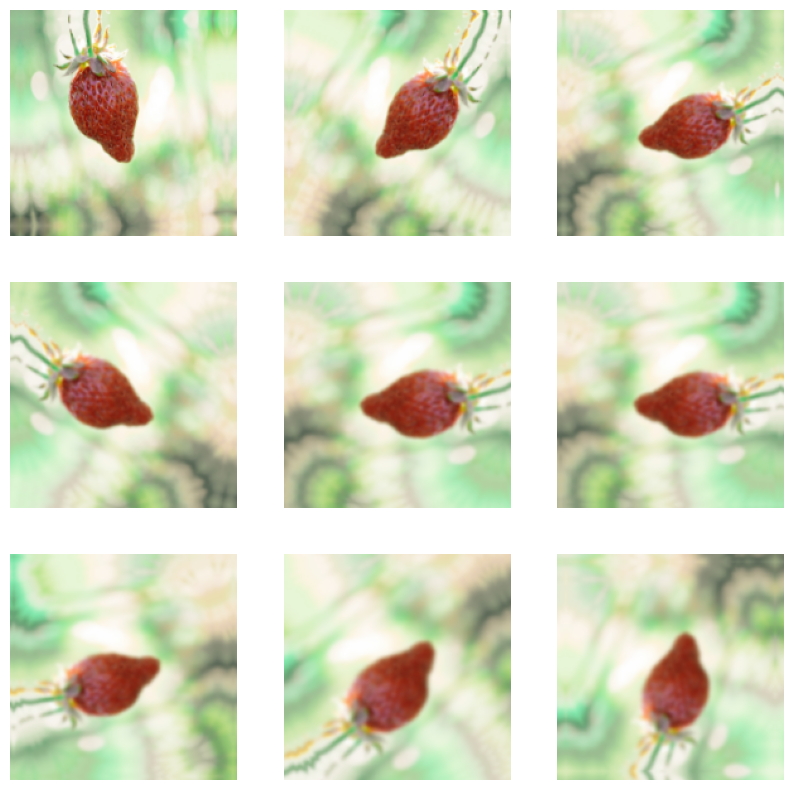

In [15]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

### MobileNet
- Salah satu algoritma yang dirancang untuk perangkat dengan keterbatasan sumber daya seperti smartphone

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras import layers

model = Sequential([
    data_augmentation,  
    layers.Rescaling(1./255, input_shape=(img_size, img_size, 3)),  # Normalisasi

    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    layers.GlobalAveragePooling2D(),

    Dense(128, activation='relu'),
    Dropout(0.3),  

    Dense(len(class_names), activation='softmax')  
])


In [17]:
from tensorflow.keras.optimizers import Adam 

model.compile(
    optimizer=Adam(learning_rate=1e-4), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'] 
)


In [18]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,147 (430.26 KB)

 Trainable params: 110,147 (430.26 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=7,
                               mode='max')

history= model.fit(train_ds, #data pelatihan yang telah disiapkan
                   epochs=30, # jumlah maksimal epoch
                   validation_data=val_ds,  #data validasi untuk mengevaluasi model pada setiap epoch
                   callbacks=[early_stopping]) #menambahkan early stopping ke dalam callback untuk pelatihan

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 206ms/step - accuracy: 0.3855 - loss: 1.0967 - val_accuracy: 0.5455 - val_loss: 1.0829
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.5794 - loss: 1.0790 - val_accuracy: 0.5682 - val_loss: 1.0660
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.5786 - loss: 1.0668 - val_accuracy: 0.5909 - val_loss: 1.0453
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.5972 - loss: 1.0414 - val_accuracy: 0.6364 - val_loss: 1.0178
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.6652 - loss: 0.9958 - val_accuracy: 0.6136 - val_loss: 0.9803
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - accuracy: 0.6769 - loss: 0.9630 - val_accuracy: 0.6591 - val_loss: 0.9329
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.7256 - loss: 0.9180 - val_accuracy: 0.6591 - val_loss: 0.8780
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.7443 - loss: 0.8627 - val_accuracy: 0.8182 - val_loss: 0.8200

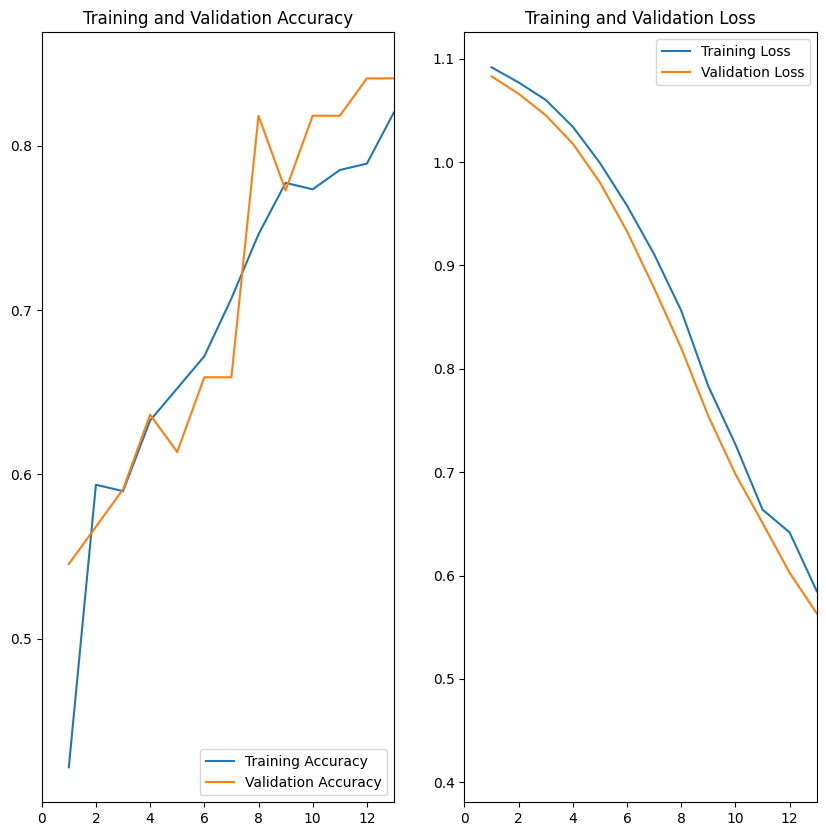

In [20]:
#membuat range untuk epoch berdasarkan panjang data loss dari pelatihan
ephocs_range = range(1, len(history.history['loss']) + 1)

plt.figure(figsize=(10, 10)) #membuat figure dengan ukuran 10x10 untuk menampilkan 2 grafik (Training and Validation Accuracy dan Loss)

#grafik pertama (Training and Validation Accuracy)
plt.subplot(1, 2, 1) #membuat subplot pertama dalam layout 1 baris dan 2 kolom
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy') #plot akurasi pelatihan
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy') #plot akurasi validasi
plt.legend(loc='lower right') #membuat legenda (informasi elemen visual) di sudut kanan bawah
plt.xlim(0, 13) #mengatur batas nilai pada sumbu x dari epoch 1 sampai 13
plt.title('Training and Validation Accuracy') #memberi judul grafik

#grafik kedua (Training and Validation Loss)
plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.xlim(0, 13)
plt.title('Training and Validation Loss')
plt.show()

In [21]:
#menyimpan model yang telah dilatih
model.save('MobileNet_Tensorflow.h5')

In [22]:
model.save('MobileNet_Tensorflow.h5', save_format='h5')


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from PIL import Image

model = load_model(r'MobileNet_Tensorflow.h5')  # Ganti dengan path model Anda
class_names = ['BlackBerry', 'Blueberry', 'Strawberry'] #kelas yang ada pada model

def classify_images(image_path, save_path='predicted_image.jpg'):
    try:
        #memuat dan mempersiapkan gambar untuk prediksi
        input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180)) #membuat gambar dari path dan mnegubah ukurannya menjadi 180x180 pixel
        input_image_array = tf.keras.utils.img_to_array(input_image) #mengubah gambar jadi array numpy agar bisa di proses model
        input_image_exp_dim = tf.expand_dims(input_image_array, 0)  #menambahkan dimensi batch agar sesuai dengan input model
                                                                    

        
        predictions = model.predict(input_image_exp_dim) 
        result = tf.nn.softmax(predictions[0]) 
        class_idx = np.argmax(result) 
        confidence = np.max(result) * 100 

        #menampilkan hasil prediksi dan confidence
        print(f"Prediksi: {class_names[class_idx]}") 
        print(f"Confidence: {confidence:.2f}%") 

        #menyimpan gambar asli tanpa teks
        input_image = Image.open(image_path) 
        input_image.save(save_path) 

        return f"Prediksi: {class_names[class_idx]} dengan confidence {confidence:.2f}%. Gambar asli disimpan di {save_path}."
    except Exception as e:
        return f"Terjadi kesalahan: {e}"

result = classify_images(r'test_data/blackberry/H4b446bd4676944fba8581494a45b9eeeK.jpg_300x300.jpg', save_path='blackberry.jpg')
print(result)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prediksi: BlackBerry
Confidence: 48.76%
Prediksi: BlackBerry dengan confidence 48.76%. Gambar asli disimpan di blackberry.jpg.


Found 30 files belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step


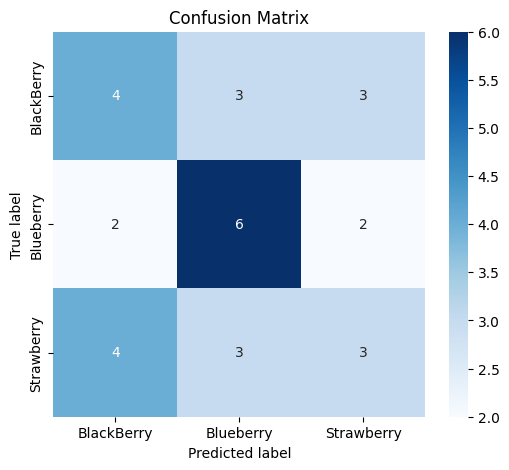

Confusion Matrix:
 [[4 3 3]
 [2 6 2]
 [4 3 3]]
Akurasi: 0.43333333333333335
Presisi: [0.4   0.5   0.375]
Recall: [0.4 0.6 0.3]
F1 Score: [0.4        0.54545455 0.33333333]


In [24]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

#memuat model yang telah dilatih sebelumnya
mobileNet_model = load_model(r'MobileNet_Tensorflow.h5')

#memuat data test yang sebenarnya
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data', #direktori data uji
    labels='inferred', #label otomatis dari subfolder yang ada
    label_mode='categorical',  #menghasilkan label dalam bentuk one-hot encoding
    batch_size=32, #ukuran batch untuk pemrosesan
    image_size=(180, 180) #ukuran gambar yang akan diproses
)

#prediksi model
y_pred = mobileNet_model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)  #konversi ke kelas prediksi

true_labels = [] #menyimpan label asli dalam bentuk indeks
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())  #konversi one-hot ke indeks kelas
true_labels = tf.convert_to_tensor(true_labels) #mengkonversi list ke tensor untuk perhitungan

#membuat confusion matrix untuk evaluasi
conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class)

#menghitung akurasi berdasarkan confusion matrix
accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

#mnghitung presisi dan recall dari confusion matrix
precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

#menghitung F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

#visualisasi Confusion Matrix
plt.figure(figsize=(6, 5)) #mengatur ukuran gambar
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', #annot=True untuk menampilkan angka di dalam setiap sel matriks
                                                                 #fmt='d' untuk menampilkan bilangan bulat tanpa desimal
            xticklabels=["BlackBerry", "Blueberry", "Strawberry"], yticklabels=["BlackBerry", "Blueberry", "Strawberry"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

# Menampilkan hasil
print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
